In [1]:
# MSM 107 analysis
# ROSINA data
# analysis of image information

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from datetime import datetime

In [2]:
# filepath
#rosinapath = "/Volumes/SEGATE1T/MSM107/06_ROSINA_new/"
#ctdpath = "/Volumes/SEGATE1T/MSM107/04_CTD-Idronaut/msm107_ctd.xlsx"
rosinapath = "/Users/dkim/Desktop/work/MSM107_analysis/data/06_ROSINA_new"
ctdfile = "/Users/dkim/Desktop/work/MSM107_analysis/data/04_CTD-Idronaut/msm107_ctd.xlsx"
plotpath = "/Users/dkim/Desktop/work/MSM107_analysis/plots"
ctdpath = "/Users/dkim/Desktop/work/MSM107_analysis/data/04_CTD-Idronaut"

particle_bin = ["Rosi01/Profile01_BinnedData_220909-0901.txt", "Rosi02/Profile02_BinnedData_220909-1310.txt", "Rosi03/Profile03_BinnedData_220909-1328.txt",
"Rosi04/Profile04_BinnedData_220909-1404.txt", "Rosi05/Profile05_BinnedData_220909-1842.txt", "Rosi06/Profile06_BinnedData_220912-1017.txt",
"Rosi07/Profile07_BinnedData_220910-0846.txt", "Rosi08/Profile08_BinnedData_220911-0857.txt", "Rosi09/Profile09_BinnedData_220911-1547.txt",
"Rosi10/Profile10_BinnedData_220909-1508.txt", "Rosi11/Profile11_BinnedData_220911-1601.txt", "Rosi12/Profile12_BinnedData_220912-1135.txt",
"Rosi13/Profile13_BinnedData_220912-1205.txt", "Rosi14/Profile14_BinnedData_220914-1313.txt", "Rosi15/Profile15_BinnedData_220914-1715.txt",
"Rosi16/Profile16_BinnedData_220915-0824.txt", "Rosi17/Profile17_BinnedData_220915-0924.txt", "Rosi18/Profile18_BinnedData_220915-1235.txt",
"Rosi19/Profile19_BinnedData_220915-1349.txt", "Rosi20/Profile20_BinnedData_220915-1413.txt"
]
particle_img = ["Rosi01/Profile01_ProcessingLogFile_220909-0901.txt", "Rosi02/Profile02_ProcessingLogFile_220909-1310.txt", "Rosi03/Profile03_ProcessingLogFile_220909-1328.txt",
"Rosi04/Profile04_ProcessingLogFile_220909-1404.txt", "Rosi05/Profile05_ProcessingLogFile_220909-1842.txt", "Rosi06/Profile06_ProcessingLogFile_220912-1017.txt",
"Rosi07/Profile07_ProcessingLogFile_220910-0846.txt", "Rosi08/Profile08_ProcessingLogFile_220911-0857.txt", "Rosi09/Profile09_ProcessingLogFile_220911-1547.txt",
"Rosi10/Profile10_ProcessingLogFile_220909-1508.txt", "Rosi11/Profile11_ProcessingLogFile_220911-1601.txt", "Rosi12/Profile12_ProcessingLogFile_220912-1135.txt",
"Rosi13/Profile13_ProcessingLogFile_220912-1205.txt", "Rosi14/Profile14_ProcessingLogFile_220914-1313.txt", "Rosi15/Profile15_ProcessingLogFile_220914-1715.txt",
"Rosi16/Profile16_ProcessingLogFile_220915-0824.txt", "Rosi17/Profile17_ProcessingLogFile_220915-0924.txt", "Rosi18/Profile18_ProcessingLogFile_220915-1235.txt",
"Rosi19/Profile19_ProcessingLogFile_220915-1349.txt", "Rosi20/Profile20_ProcessingLogFile_220915-1413.txt"
]

CTD_station_list = [
"01-Profile01/MSM107-P001-C02.txt", "02-Profile03/MSM107-P003-C01.txt",
"03-Profile04/MSM107-P004-C01.txt", "04-Profile05/MSM107-P005-C01.txt",
"05-Profile06/MSM107-P006-C01.txt", "06-Profile07/MSM107-P007-C03.txt",
"07-Profile08/MSM107-P008-C01.txt", "08-Profile10/MSM107-P010-C01.txt",
"09-Profile11/MSM107-P011-C01.txt", "10-Profile12/MSM107-P012-C03.txt", "11-Profile13/MSM107-P013-C03.txt",
"12-Profile14/MSM107-P014-C01.txt", "13-Profile15/MSM107-P015-C01.txt",
"14-Profile16/MSM107-P016-C01.txt", "15-Profile17/MSM107-P017-C02.txt",
"16-Profile18/MSM107-P018-C01.txt", "17-Profile19/MSM107-P019-C01.txt",
"18-Profile20/MSM107-P020-C02.TXT"
]

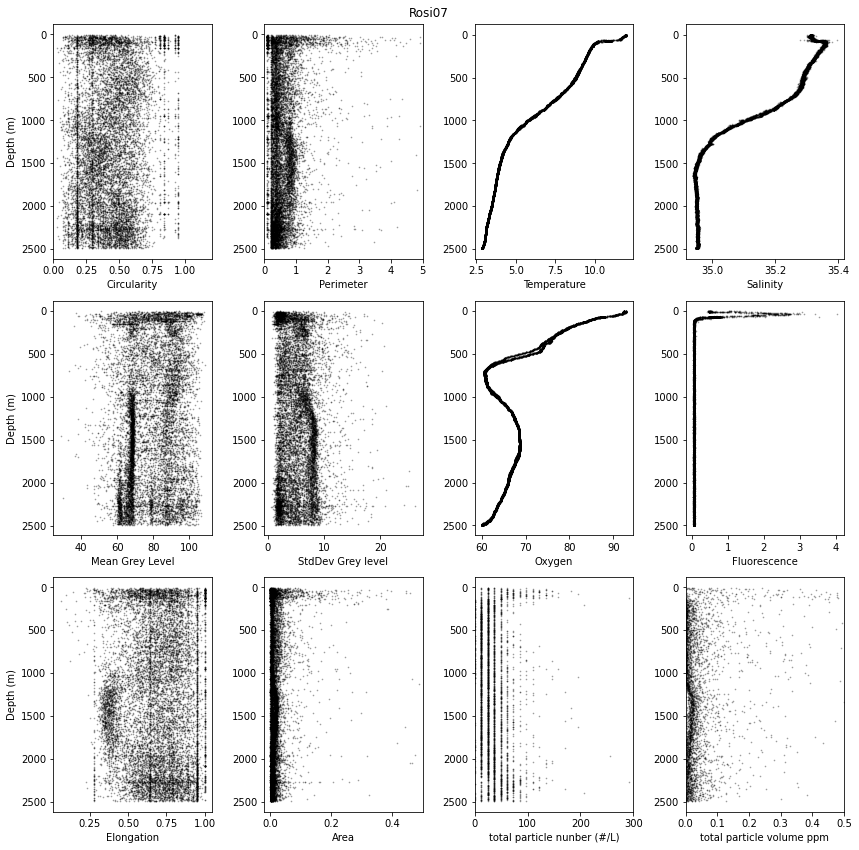

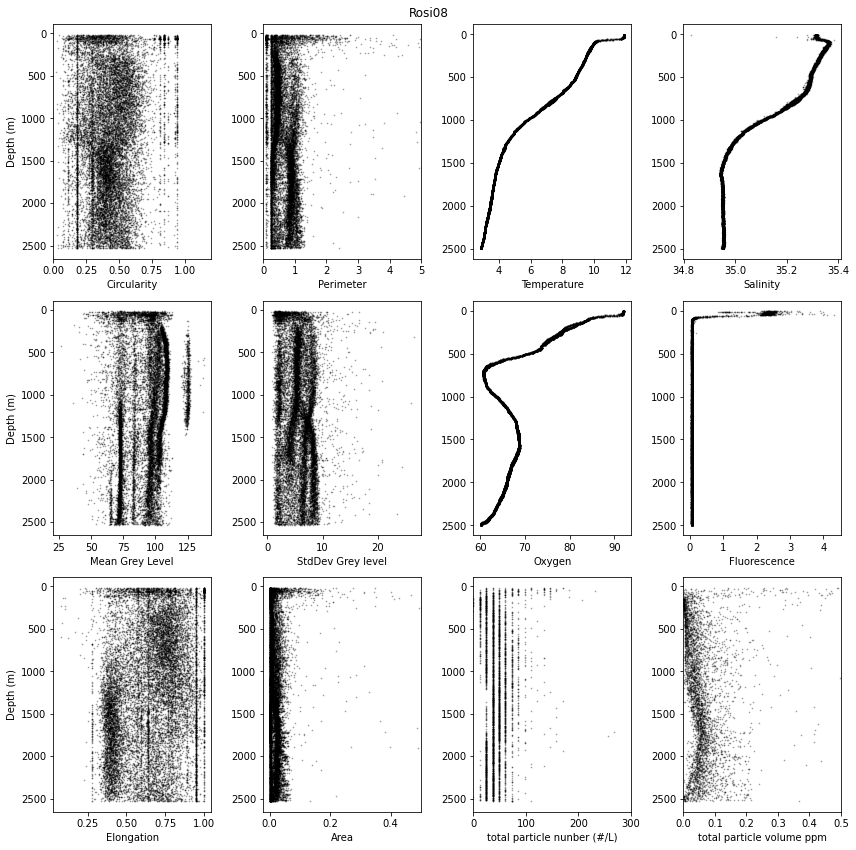

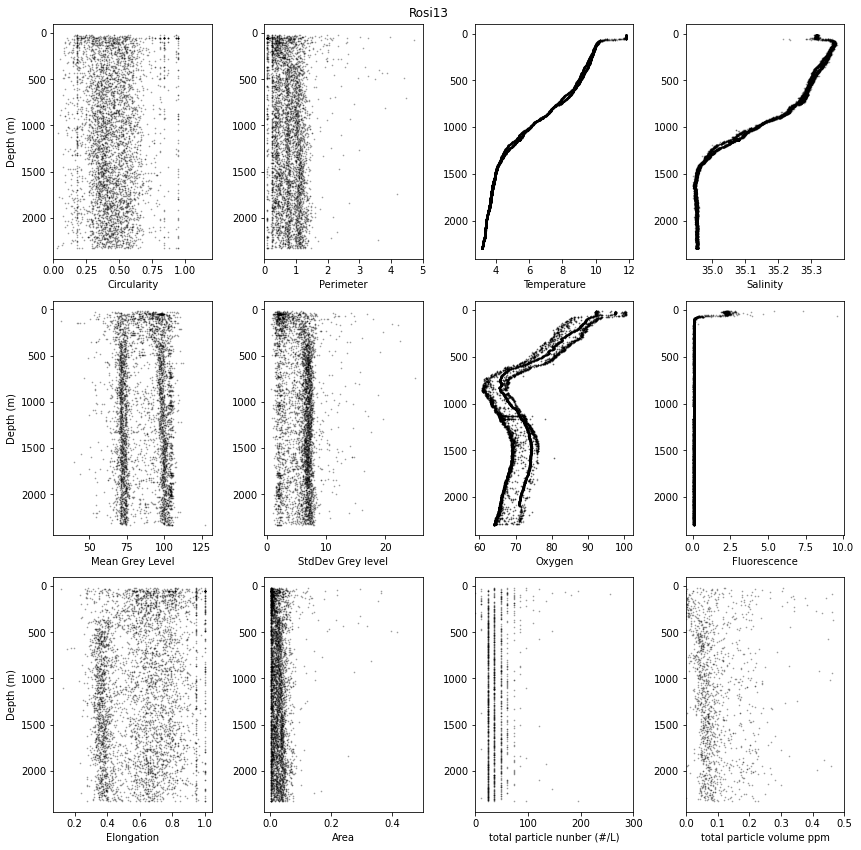

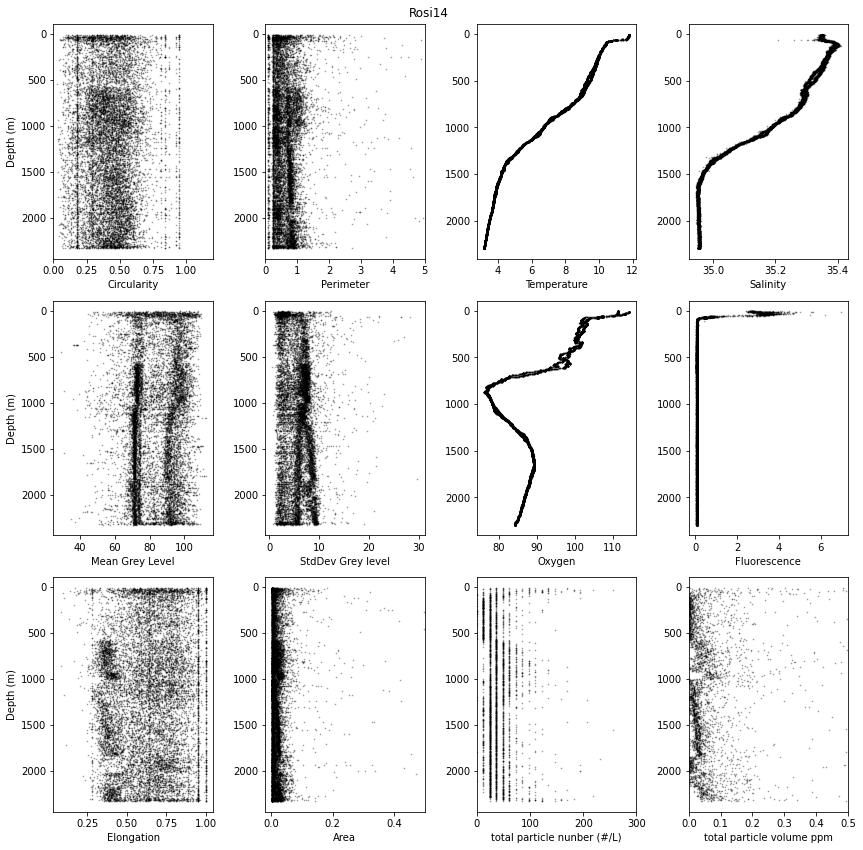

In [3]:
from re import M
# plot for particle image profiles

ctddepth = pd.read_excel(ctdfile)
bins = [0.04875, 0.061425, 0.0773955, 0.0975183, 0.122873, 0.15482, 0.195073, 0.245792, 0.309698, 0.39022, 0.491677, 0.619513,
        0.780587, 0.983539, 1.23926, 1.56147, 1.96745, 2.47898, 3.12352, 3.93564, 5]
params = ["ImgNo",  "ActContour",  "NoOfContours",  "EquiDia",  "AspectRatio",  "CumTotArea",  "Area",  "CumTotVol",
  "Volume",  "RectX",  "RectY",  "RectWidth",  "RectHeight",  "MinRectWidth",  "MinRectHeight",  "EdgeContact",  "Perimeter",
    "Circularity",  "Elongation",  "Major",  "Feret",  "Mean",   "StdDev",  "Intden",  "Range",  "Meanpos",  "Cv",  "Sr",  "Median",
      "Modal",  "BckgrdMean",  "BckgrdStdDev" ]
profile2run = ["Profile07", "Profile08", "Profile13", "Profile14"] # profilename
for p in profile2run:
    ctd_idx = [idx for idx, s in enumerate(CTD_station_list) if p in s][0] # ctd file index
    p_idx = [idx for idx, s in enumerate(particle_bin) if p in s][0] # particle file index
    i_idx = [idx for idx, s in enumerate(particle_img) if p in s][0] # img file index
    profile = particle_bin[p_idx].split(os.sep)[0] # rosina profile number e.g. Rosi01
    bindata = pd.read_csv(os.path.expanduser( os.path.join(rosinapath, particle_bin[i_idx]) ), sep="\s+", skiprows=24, header=0,index_col=False, engine="python")
    imgdata = pd.read_csv(os.path.expanduser( os.path.join(rosinapath, particle_img[i_idx]) ),sep="\s+", skiprows=23,index_col=False, names=params, engine="python")
    ctddf = pd.read_csv(os.path.expanduser( os.path.join(ctdpath, CTD_station_list[ctd_idx]) ), sep="\t", skiprows=16, header=0, engine="python")
    
    ## particle volume and number data into separate dataframe
    numdf = bindata.iloc[:, 1:22] # particle number df
    numdf.columns = bins
    voldf = bindata.iloc[:, 43:64] # particle volumn df
    voldf.columns = bins

    ## add depth information based on the sdepth and edepth from CTD and Imagenumber
    imgno = bindata.iloc[:, 0].to_list() # image no
    sdepth, edepth = ctddepth["sdepth"].loc[ctddepth["profile"] == profile].values[0], ctddepth["edepth"].loc[ctddepth["profile"] == profile].values[0]
    dinterval =  (edepth-sdepth) / len(imgno) # interval between the img profile no
    depth = np.arange(sdepth, edepth, dinterval)[:len(imgno)]
    
    # append depth info to binned particle data 
    numdf["depth"] = depth
    voldf["depth"] = depth

    # append depth info to image data
    dimgdf = pd.DataFrame({"depth":depth, "ImgNo":imgno})
    imgdf = imgdata.merge(dimgdf, on="ImgNo", how="left")

    """
    imgdf: has information of each cropped images and corresponding depth information is appended
    numdf: has binned particle information with number distribution
    voldf: has binned particle information with volumn distribution
    """
    
    fig, ax = plt.subplots(3,4, figsize=(12, 12), facecolor="white", )

    fig.suptitle(profile) # plot name

    ## particle image properties 
    ax1 = ax[0,0]
    ax1.scatter(imgdf["Circularity"], imgdf["depth"], s=0.5, alpha=0.3, color="black")
    ax1.set_xlabel("Circularity")
    ax1.set_ylabel("Depth (m)")
    ax1.set_xlim(0, 1.2)
    ax1.invert_yaxis()

    ax2 = ax[0,1]
    ax2.scatter(imgdf["Perimeter"], imgdf["depth"], s=0.5, alpha=0.3, color="black")
    ax2.set_xlabel("Perimeter")
    ax2.set_xlim(0, 5)
    ax2.invert_yaxis()

    ax3 = ax[1,0]
    ax3.scatter(imgdf["Mean"], imgdf["depth"], s=0.5, alpha=0.3, color="black")
    ax3.set_xlabel("Mean Grey Level")
    ax3.set_ylabel("Depth (m)")
    ax3.invert_yaxis()

    ax4 = ax[1,1]
    ax4.scatter(imgdf["StdDev"], imgdf["depth"], s=0.5, alpha=0.3, color="black")
    ax4.set_xlabel("StdDev Grey level")
    ax4.invert_yaxis()

    ax5 = ax[2,0]
    ax5.scatter(imgdf["Elongation"], imgdf["depth"], s=0.5, alpha=0.3, color="black")
    ax5.set_xlabel("Elongation")
    ax5.set_ylabel("Depth (m)")
    #ax5.set_xlim(0, 1.0)
    ax5.invert_yaxis()

    ax6 = ax[2,1]
    ax6.scatter(imgdf["Area"], imgdf["depth"], s=0.5, alpha=0.3, color="black")
    ax6.set_xlabel("Area")
    ax6.set_xlim(-0.02, 0.5)
    ax6.invert_yaxis()

    ## CTD data
    ax7 = ax[0,2]
    ax7.scatter(ctddf["Temperature"], ctddf["Depth"], s=0.5, alpha=0.3, color="black")
    ax7.set_xlabel("Temperature")
    #ax7.set_xlim(-0.02, 0.5)
    ax7.invert_yaxis()

    ax8 = ax[0,3]
    ax8.scatter(ctddf["Salinity"], ctddf["Depth"], s=0.5, alpha=0.3, color="black")
    ax8.set_xlabel("Salinity")
    #ax8.set_xlim(-0.02, 0.5)
    ax8.invert_yaxis()

    ax9 = ax[1,2]
    ax9.scatter(ctddf["Optical O2%"], ctddf["Depth"], s=0.5, alpha=0.3, color="black")
    ax9.set_xlabel("Oxygen")
    #ax9.set_xlim(-0.02, 0.5)
    ax9.invert_yaxis()

    ax10 = ax[1,3]
    ax10.scatter(ctddf["Fluorometer AutoScale"], ctddf["Depth"], s=0.5, alpha=0.3, color="black")
    ax10.set_xlabel("Fluorescence")
    #ax10.set_xlim(-0.02, 0.5)
    ax10.invert_yaxis()

    ## particle data
    ax11 = ax[2,2]
    ax11.scatter(numdf.iloc[:, 0:-1].sum(axis=1), numdf["depth"], s=0.5, alpha=0.3, color="black")
    ax11.set_xlabel("total particle nunber (#/L)")
    ax11.set_xlim(0, 300)
    ax11.invert_yaxis()

    ax12 = ax[2,3]
    ax12.scatter(voldf.iloc[:, 0:-1].sum(axis=1), voldf["depth"], s=0.5, alpha=0.3, color="black")
    ax12.set_xlabel("total particle volume ppm")
    ax12.set_xlim(0, 0.5)
    ax12.invert_yaxis()

    fig.tight_layout()
    fig.savefig(os.path.join(plotpath, str(profile+"img")), dpi=300, facecolor="white")

In [30]:
ctdDepthConversionFactor = -1 #-0.955055864

for c in range (0, len(croppath)):
    ###### read in data ######
    imgpath_list = []
    imgpath = os.path.expanduser( os.path.join(rosinapath, croppath[c]) )

    ###### handling CTD data #######
    CTDPath = os.path.expanduser( os.path.join(ctdpath, depthpathlist[c]) )
    CTDdf = pd.read_csv(CTDPath, sep="\t", skiprows=16, header=0, engine="python")

    CTDdf["Time"] = CTDdf["Time"].apply(lambda x: str(x).split(".")[0]) # drop millisecond
    CTDdf["DateTime"] = pd.to_datetime(CTDdf["Time"], format="%d/%m/%Y %H:%M:%S")


    ####### crab images #######
    imgpath_list.extend(glob.glob( os.path.join(imgpath, "*.tiff")) ) # grab all crop images
    df = pd.DataFrame(columns=["depth", "profile", "id", "area", "perimeter", "roundness", "gray_mean", "gray_std"])
    depth_L, imgNo_L, profile_L, id_L, area_L, perimeter_L, roundness_L, gray_mean_L, gray_std_L = [], [], [],[],[],[],[],[],[],
    for i in imgpath_list: # looping through the images
        imgNo = float(i.split(os.path.sep)[-1].split("_")[0])
        id = str(i.split(os.path.sep)[-1].split("_")[1].split("-")[0])
        profile = str(i.split(os.path.sep)[-1].split("_")[1].split("-")[-1])
        imgdate = i.split(os.path.sep)[-1].split("_")[2]
        imgtime = i.split(os.path.sep)[-1].split("_")[3].split(".")[0]
        imgdatetime = datetime.strptime(str(imgdate) + str(imgtime), '%Y%m%d%H%M%S')

        ##### find depth based on CTD data #####

        depth = CTDdf["Depth"].loc[CTDdf["DateTime"]==imgdatetime]
        print(CTDdf["DateTime"])
        if not depth.empty:
            print(depth)
            continue
        else:
            print("close")
            neighbour_ind = CTDdf.loc[CTDdf["DateTime"] < imgdatetime]
            print(imgdatetime)
            print(neighbour_ind)
        print(depth)
        break




        ##### extract image information from image #########
        im = Image.open(i).convert("RGB")
        na = np.array(im) # convert to numpy array
        orig = na.copy() # save original copy

        bluY, bluX = np.where(np.all(na==[0,0,255],axis=2)) # find coordinate of blue line
        coord = np.vstack((bluX, bluY)).T # create array of coordinates of blue line 

        # calculate roundness
        area = cv2.contourArea(coord)
        perimeter = cv2.arcLength(coord, closed=True) # perimeter of cntr of closed form
        roundness = (4*np.pi*area)/(perimeter*perimeter) # roundness

        # calculate gray level and evenness
        mask_array = np.zeros(na.shape,  np.uint8) # create 0 array having same shape of image
        cv2.drawContours(mask_array, [coord], 0, (0,255,0), -1) # within the contour area convert the value as 255 (white)
        masked_img = np.ma.masked_array(na, mask= (mask_array != 255)) # careful!! 1 is True, 0 is False. in this mask_array, background is False and object is True
        gray_mean = np.mean(masked_img) # unmasked(False=background) will be ignored and masked(Ture=object) will only be considered
        gray_std = np.std(masked_img)

        #plt.imshow(masked_img)

        #### append data into each list ####
        depth_L.append(depth)
        imgNo_L.append(imgNo)
        profile_L.append(profile)
        id_L.append(id)
        area_L.append(area)
        perimeter_L.append(perimeter)
        roundness_L.append(roundness)
        gray_mean_L.append(gray_mean)
        gray_std_L.append(gray_std)
    break
    # input lists into each columns
    df["depth"] = depth_L
    df["imgNo"] = imgNo_L
    df["profile"] =profile_L
    df["id"] =id_L
    df["area"] =roundness_L
    df["perimeter"] =perimeter_L
    df["roundness"] =roundness_L
    df["gray_mean"] =gray_mean_L
    df["gray_std"] =gray_std_L

    # extract the image inside of the blue line
    # get image information
    # save in the dataframe
    # save dataframe in the folder
    df_name = os.path.join(pathlib.Path(imgpath).parents[0], str(profile+".csv") )
    df.to_csv(df_name, index=False, sep="\t")



0       2022-05-25 05:27:07
1       2022-05-25 05:27:08
2       2022-05-25 05:27:09
3       2022-05-25 05:27:10
4       2022-05-25 05:27:11
                ...        
14958   2022-05-25 09:36:25
14959   2022-05-25 09:36:26
14960   2022-05-25 09:36:27
14961   2022-05-25 09:36:28
14962   2022-05-25 09:36:29
Name: DateTime, Length: 14963, dtype: datetime64[ns]
close
2022-05-25 03:30:01
Empty DataFrame
Columns: [Time, Time(s), CTD Speed, Pressure, Depth, Temperature, Conductivity, Salinity, Optical O2%, Optical O2ppm, Fluorometer AutoScale, Turbidity AutoScale, Sound Velocity (calc), SigmaT, DateTime]
Index: []
Series([], Name: Depth, dtype: float64)
